# importing necessary Librarys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC

# importing data

In [3]:
a = pd.read_csv(r"C:\Users\easil\Downloads\itsm.csv")
a

C:\Users\easil\AppData\Local\Temp\ipykernel_10624\2971570377.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  a = pd.read_csv(r"C:\Users\easil\Downloads\itsm.csv")


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


# EDA

In [4]:
a.shape

(46606, 25)

In [5]:
a.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [6]:
a.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3.0,0.902320,...,NaN,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1.0,SD0147088,NaN,NaN,NaN


In [7]:
a.head().T

,0,1,2,3,4
CI_Name,SUB000508,WBA000124,DTA000024,WBA000124,WBA000124
CI_Cat,subapplication,application,application,application,application
CI_Subcat,Web Based Application,Web Based Application,Desktop Application,Web Based Application,Web Based Application
WBS,WBS000162,WBS000088,WBS000092,WBS000088,WBS000088
Incident_ID,IM0000004,IM0000005,IM0000006,IM0000011,IM0000012
Status,Closed,Closed,Closed,Closed,Closed
Impact,4,3,NS,4,4
Urgency,4,3,3,4,4
Priority,4.0,3.0,NaN,4.0,4.0
number_cnt,0.601292,0.41505,0.517551,0.642927,0.345258


In [8]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [9]:
a.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [10]:
a.describe(include=object)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,34636,2244,33627,34528,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,29-10-2013 15:03,10/10/2013 12:53,2/10/2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,7,2,7,21,236,16470,3434,110


In [11]:
a.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

# Data processing

* *CI_Cat*, *CI_Subcategory* had a lot of values then it replace by the major ones.unknown values replaced by model values.


In [12]:
a.CI_Cat.replace(['database'],'storage',inplace=True)
a.CI_Cat.replace(['applicationcomponent'],'subapplication',inplace=True)
a.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
a.CI_Cat.replace([np.nan],'application',inplace=True)

In [13]:
a.CI_Cat.isnull().sum()

0

In [14]:
a.CI_Cat.unique()

array(['subapplication', 'application', 'computer', 'hardware',
       'software', 'storage'], dtype=object)

In [15]:
a.CI_Subcat.unique()

array(['Web Based Application', 'Desktop Application',
       'Server Based Application', 'SAP', 'Client Based Application',
       'Citrix', 'Standard Application', 'Windows Server', 'Laptop',
       'Linux Server', nan, 'Monitor', 'Automation Software', 'SAN',
       'Banking Device', 'Desktop', 'Database', 'Oracle Server',
       'Keyboard', 'Printer', 'Exchange', 'System Software', 'VDI',
       'Encryption', 'Omgeving', 'MigratieDummy', 'Scanner', 'Controller',
       'DataCenterEquipment', 'KVM Switches', 'Switch',
       'Database Software', 'Network Component', 'Unix Server', 'Lines',
       'ESX Cluster', 'zOS Server', 'SharePoint Farm', 'NonStop Server',
       'Application Server', 'Security Software', 'Thin Client',
       'zOS Cluster', 'Router', 'VMWare', 'Net Device', 'Neoview Server',
       'MQ Queue Manager', 'UPS', 'Number', 'Iptelephony',
       'Windows Server in extern beheer', 'Modem', 'X86 Server',
       'ESX Server', 'Virtual Tape Server', 'IPtelephony',
     

In [16]:
a.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
a.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
a.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
a.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
a.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
a.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
a.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
a.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

In [17]:
a.CI_Subcat.isnull().sum()

0

In [18]:
a.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


. Replacing Null values with Mode

In [19]:
a.Priority.replace([np.nan],a.Priority.mode(),inplace=True)
a.No_of_Related_Interactions.replace([np.nan],a.No_of_Related_Interactions.mode(),inplace=True)
a.No_of_Related_Incidents.replace([np.nan],a.No_of_Related_Incidents.mode(),inplace=True)
a.No_of_Related_Changes.replace([np.nan],a.No_of_Related_Changes.mode(),inplace=True)

In [20]:
a.isnull().sum()

CI_Name                           0
CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions        0
Related_Interaction               0
No_of_Related_Incidents           0
No_of_Related_Changes             0
Related_Change                46046
dtype: int64

In [21]:
a.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

*So much Null values in Reopen_Time, Resolved_Time, Related_Change then drop this columns.

In [22]:
a.drop(columns=['Reopen_Time','Resolved_Time','Related_Change'],axis=1,inplace=True)

In [23]:
a.isnull().sum()

CI_Name                         0
CI_Cat                          0
CI_Subcat                       0
WBS                             0
Incident_ID                     0
Status                          0
Impact                          0
Urgency                         0
Priority                        0
number_cnt                      0
Category                        0
KB_number                       0
Alert_Status                    0
No_of_Reassignments             1
Open_Time                       0
Close_Time                      0
Handle_Time_hrs                 1
Closure_Code                  460
No_of_Related_Interactions      0
Related_Interaction             0
No_of_Related_Incidents         0
No_of_Related_Changes           0
dtype: int64

In [24]:
a.drop(columns=['No_of_Reassignments','Handle_Time_hrs'],axis=0,inplace=True)   #drop the rows where nan value

In [25]:
a.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,5/2/2012 13:32,4/11/2013 13:51,Other,1.0,SD0000007,2.0,1.0
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,12/3/2012 15:44,2/12/2013 12:36,Software,1.0,SD0000011,1.0,1.0
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,4.0,0.517551,request for information,KM0000339,closed,29-03-2012 12:36,13-01-2014 15:13,No error - works as designed,1.0,SD0000017,1.0,1.0
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,17-07-2012 11:49,14-11-2013 09:31,Operator error,1.0,SD0000025,1.0,1.0
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,10/8/2012 11:01,8/11/2013 13:55,Other,1.0,SD0000029,1.0,1.0


* Saving the clean data set

In [26]:
a.to_csv("Clean_data_itsm")

#  Total Category Counts

In [27]:
category_counts = a.CI_Cat.value_counts().reset_index().rename(columns={'CI_Cat':'Total_Counts','index':'Category'})
category_counts

,Category,Total_Counts
0,application,33011
1,subapplication,7787
2,computer,3643
3,storage,917
4,hardware,915
5,software,333


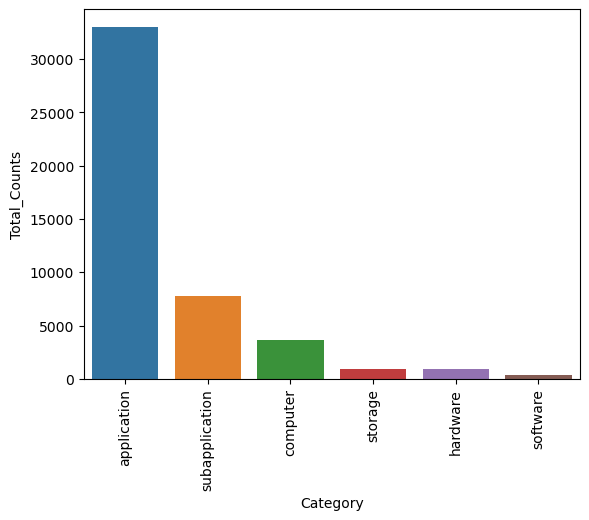

In [28]:
sns.barplot(data=category_counts,x='Category',y='Total_Counts')
plt.xticks(rotation=90)
plt.show()

In [29]:
sub_category_counts = a.CI_Subcat.value_counts().reset_index().rename(columns={'CI_Subcat':'Total_Counts','index':'SUB_Category'})
sub_category_counts

,SUB_Category,Total_Counts
0,Server Based Application,19208
1,Web Based Application,15422
2,Desktop Application,4299
3,System Software,2363
4,Laptop,1921
5,Banking Device,917
6,Database,570
7,SAN,549
8,Client Based Application,492
9,Monitor,212


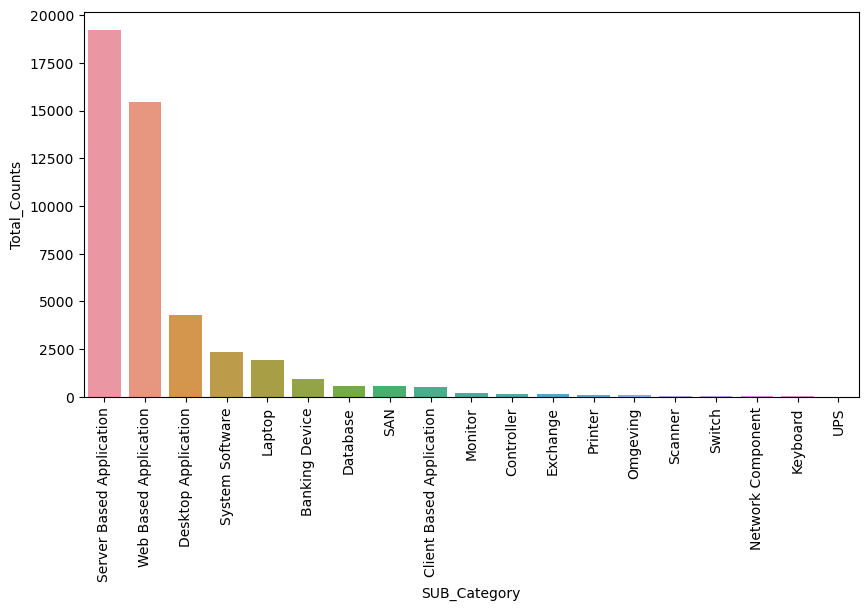

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data=sub_category_counts,x='SUB_Category',y='Total_Counts')
plt.xticks(rotation=90)
plt.show()

In [31]:
a.groupby(['CI_Cat','CI_Subcat'])['CI_Subcat'].count()

CI_Cat          CI_Subcat               
application     Client Based Application      486
                Desktop Application          3876
                Exchange                      130
                Server Based Application    17600
                System Software              1834
                Web Based Application        9085
computer        Banking Device                916
                Database                       20
                Desktop Application           423
                Laptop                       1921
                Omgeving                       86
                Server Based Application      255
                System Software                11
                Web Based Application          11
hardware        Database                      337
                Keyboard                       27
                Monitor                       212
                Network Component              51
                Printer                        88
         

In [32]:
a.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,5/2/2012 13:32,4/11/2013 13:51,Other,1.0,SD0000007,2.0,1.0
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,12/3/2012 15:44,2/12/2013 12:36,Software,1.0,SD0000011,1.0,1.0
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,4.0,0.517551,request for information,KM0000339,closed,29-03-2012 12:36,13-01-2014 15:13,No error - works as designed,1.0,SD0000017,1.0,1.0
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,17-07-2012 11:49,14-11-2013 09:31,Operator error,1.0,SD0000025,1.0,1.0
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,10/8/2012 11:01,8/11/2013 13:55,Other,1.0,SD0000029,1.0,1.0


In [33]:
prioriy_counts = a.Priority.value_counts().reset_index().rename(columns={'Priority':'Total_Counts','index':'Priority'})
prioriy_counts

,Priority,Total_Counts
0,4.0,24097
1,5.0,16486
2,3.0,5323
3,2.0,697
4,1.0,3


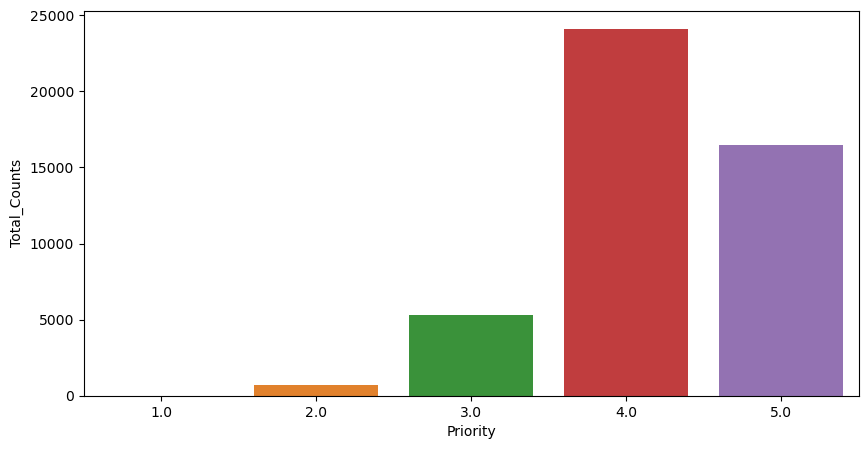

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(data=prioriy_counts,x='Priority',y='Total_Counts')
plt.show()

In [35]:
category_type_counts = a.Category.value_counts().reset_index().rename(columns={'Category':'Total_Counts','index':'Category_type'})
category_type_counts

,Category_type,Total_Counts
0,incident,37748
1,request for information,8846
2,complaint,11
3,request for change,1


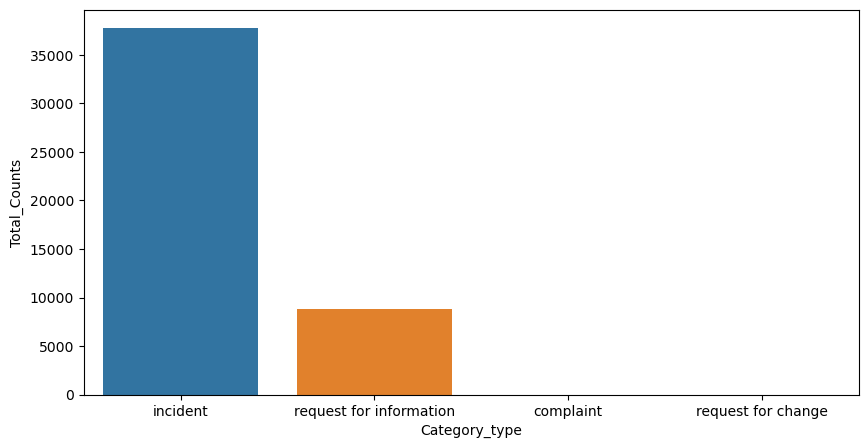

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(data=category_type_counts,x='Category_type',y='Total_Counts')
plt.show()

#  1. Predicting Priorites

* Feature selection

* Only the features which are available when the tickets arrives can be used to predict priority. Therefore, we have used only 4 predictors.

In [37]:
X = a.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
y = a.Priority

In [38]:
y

0        4.0
1        3.0
2        4.0
3        4.0
4        4.0
        ... 
46601    4.0
46602    4.0
46603    5.0
46604    4.0
46605    3.0
Name: Priority, Length: 46606, dtype: float64

In [39]:
# Label Encoding
encode = LabelEncoder()
for i in (0,1,2,3):
  X.iloc[:,i] = encode.fit_transform(X.iloc[:,i])

In [40]:
X

,CI_Cat,CI_Subcat,WBS,Category
0,5,18,137,1
1,0,18,70,1
2,0,4,74,3
3,0,18,70,1
4,0,18,70,1
...,...,...,...,...
46601,0,14,59,1
46602,0,14,59,1
46603,1,7,73,1
46604,0,18,59,1


# Train Test Split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((32624, 4), (13982, 4), (32624,), (13982,))

In [43]:
# Standeriztion
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [44]:
X_train

array([[-0.55766977, -1.92334505,  0.97482457, -0.48534412],
       [-0.55766977,  0.09268783, -0.70330871, -0.48534412],
       [-0.55766977,  0.09268783,  1.53420233, -0.48534412],
       ...,
       [-0.55766977,  0.09268783, -0.64593663, -0.48534412],
       [-0.55766977,  0.89910098,  0.54453398, -0.48534412],
       [-0.55766977,  0.09268783,  1.53420233, -0.48534412]])

In [45]:
X_test

array([[-0.55766977,  0.09268783,  1.06088269,  2.05804463],
       [-0.55766977,  0.09268783, -1.36308761, -0.48534412],
       [-0.55766977,  0.09268783, -0.38776228, -0.48534412],
       ...,
       [-0.55766977,  0.89910098, -0.70330871, -0.48534412],
       [-0.03309164, -1.31853519, -0.50250644, -0.48534412],
       [-0.55766977,  0.09268783, -0.71765173,  2.05804463]])

In [46]:
y_train

37182    5.0
39573    4.0
1595     5.0
42983    3.0
32730    5.0
        ... 
40059    4.0
28017    5.0
29199    4.0
40061    4.0
17673    4.0
Name: Priority, Length: 32624, dtype: float64

#  1.SVM

In [47]:
# Train this Model
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1)
rbf_svc.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [48]:
#Predict the model
y_predict_svm = rbf_svc.predict(X_test)

In [49]:
print("Accuracy of SVM : ",accuracy_score(y_test,y_predict_svm))

Accuracy of SVM :  0.7463166928908597


In [50]:
print("Confusion Matrix of SVM : \n",confusion_matrix(y_test,y_predict_svm))

Confusion Matrix of SVM : 
 [[   0    0    0    1    0]
 [   0  137    8   56    9]
 [   0   36  486  956  103]
 [   0   78  325 6451  400]
 [   0   10   77 1488 3361]]


In [51]:
#Finding accuracy,Precision,Recall,F1_score
print("classification_report of SVM : \n",classification_report(y_test,y_predict_svm))

classification_report of SVM : 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.65      0.58       210
         3.0       0.54      0.31      0.39      1581
         4.0       0.72      0.89      0.80      7254
         5.0       0.87      0.68      0.76      4936

    accuracy                           0.75     13982
   macro avg       0.53      0.51      0.51     13982
weighted avg       0.75      0.75      0.74     13982



C:\Users\easil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\easil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\easil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  2. Descision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
dt_pred = dt.predict(X_test)

In [54]:
#Finding Accuracy,Prescison,Recall and ConfusionMatrx
print("Accuracy Using Descison Tree : ",accuracy_score(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))


Accuracy Using Descison Tree :  0.816978972965241


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.51      0.69      0.59       210
         3.0       0.66      0.63      0.65      1581
         4.0       0.82      0.87      0.85      7254
         5.0       0.88      0.80      0.84      4936

    accuracy                           0.82     13982
   macro avg       0.58      0.60      0.58     13982
weighted avg       0.82      0.82      0.82     13982



C:\Users\easil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\easil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\easil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3. Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
y_pred_rf = model_rf.predict(X_test)


In [57]:
accuracy_score(y_test,y_pred_rf)

0.8171935345444142

In [59]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [60]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model_rf, param_grid = grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X,y)

C:\Users\easil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\easil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\easil\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\easil\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\easil\anaconda3\lib\site-packa

In [61]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best score is: 0.8115481210219198


* without using GridSearch CV model gives 0.8169

#  4. K-Nearest Model

In [62]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
knn_pred = model_knn.predict(X_test)

In [64]:
accuracy_score(y_test,knn_pred)

0.7778572450293234

In [65]:
# For Finding the best K Value to improve performance

score = []
for i in range(1,25):
  model_knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
  model_knn.fit(X_train,y_train)
  knn_pred = model_knn.predict(X_test)
  score.append(accuracy_score(y_test,knn_pred))



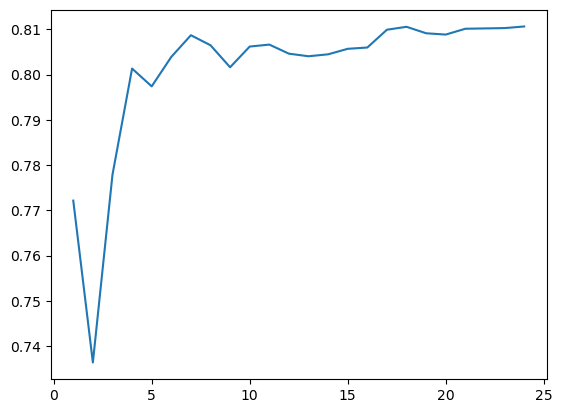

In [66]:
import matplotlib.pyplot as plt
plt.plot(range(1,25),score)

* From above graph k value is should be 15 to 17

In [67]:
k=[15,16,17]
for i in k:
  model_knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
  model_knn.fit(X_train,y_train)
  knn_pred = model_knn.predict(X_test)
  print(accuracy_score(y_test,knn_pred))

0.8056787297954513
0.8059648119010155
0.8098984408525247


In [68]:
  model_knn = KNeighborsClassifier(n_neighbors=15,metric='euclidean')
  model_knn.fit(X_train,y_train)
  knn_pred = model_knn.predict(X_test)
  print(accuracy_score(y_test,knn_pred))

0.8056787297954513


In [69]:
#Finding Accuracy,Prescison,Recall and ConfusionMatrx
print("Accuracy Using KNN : ",accuracy_score(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

Accuracy Using KNN :  0.8056787297954513


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.53      0.66      0.59       210
         3.0       0.60      0.60      0.60      1581
         4.0       0.81      0.88      0.84      7254
         5.0       0.90      0.77      0.83      4936

    accuracy                           0.81     13982
   macro avg       0.57      0.58      0.57     13982
weighted avg       0.81      0.81      0.81     13982



C:\Users\easil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\easil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\easil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
#Confusion Matrrix
print(confusion_matrix(y_test,knn_pred))

[[   0    0    0    1    0]
 [   0  138   10   44   18]
 [   0   36  951  471  123]
 [   0   75  521 6351  307]
 [   0   10  109  992 3825]]
